
Time series data typically consists of four main components:

-   Trend: The long-term movement or trajectory of the data over time. It represents the general direction in which the    data is moving. Trends can be upward, downward, or flat.

-   Seasonality: The repeating, periodic fluctuations in the data that occur at regular intervals. Seasonality often follows a specific pattern and is associated with certain times of the year, months, weeks, days, or even hours.

-   Cycle: The repeating patterns or sequences in the data that are not necessarily tied to fixed calendar intervals. Unlike seasonality, cycles might not have a fixed duration.

-   Irregularity (or Residuals): The random, unpredictable fluctuations in the data that are not accounted for by the trend, seasonality, or cycles. These irregular components are often referred to as residuals or noise.

When analyzing time series data and building forecasting models, it's important to consider and account for these components to make accurate predictions and gain insights into the underlying patterns of the data. Various time series forecasting techniques, including models like ARIMA (AutoRegressive Integrated Moving Average), SARIMA (Seasonal ARIMA), and Prophet, aim to capture and model these components to make predictions about future values in the time series.

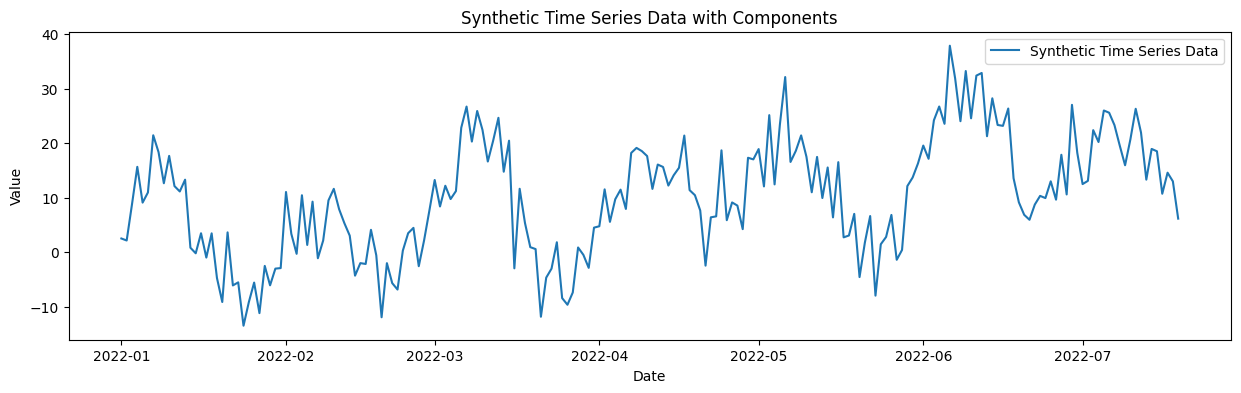

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
'''
Here, we set the random seed to 42 to ensure reproducibility. 
Setting a random seed means that if you run the code multiple times, you'll get the same random numbers each time. 
'''
np.random.seed(42)

# Create a synthetic time series dataset
''' 
We define the number of data points (n_points) and generate a range of dates (date_rng) using pd.date_range. 
The dates start from January 1, 2022, and end on July 19, 2022, with a daily frequency.
'''
n_points = 200
date_rng = pd.date_range(start='2022-01-01', end='2022-07-19', freq='D')

'''
We create a linear upward trend component. np.arange(n_points) generates 
an array of integers from 0 to n_points-1, and multiplying it by 0.1 creates a linear trend.
'''
trend = 0.1 * np.arange(n_points)

'''
We create a sine wave with a frequency of 30 
to represent the seasonality component. The np.sin function is used to generate a sine wave.
'''

seasonality = 10 * np.sin(2 * np.pi * np.arange(n_points) / 30)

''' Similarly, we create another sine wave with a different frequency of 50 
to represent the cyclical component or cycle.    '''

cycle = 5 * np.sin(2 * np.pi * np.arange(n_points) / 50)

''' We generate random noise (irregularity or residuals) using np.random.normal. 
This adds random fluctuations to the time series.  '''
irregularity = np.random.normal(0, 5, n_points)

# Combine components to create the time series data
time_series_data = trend + seasonality + cycle + irregularity

# Create a DataFrame
df = pd.DataFrame({'date': date_rng, 'value': time_series_data})

# Visualize the synthetic time series data
plt.figure(figsize=(15,4))
plt.plot(df['date'], df['value'], label='Synthetic Time Series Data')
plt.title('Synthetic Time Series Data with Components')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In this example:

-   trend represents a linear upward trend over time.
-   seasonality represents a sine wave with a frequency of 30, creating a periodic pattern.
-   cycle represents another sine wave with a different frequency of 50, introducing a cyclical pattern.
-   irregularity is added as random noise.

Now, let's visualize each component separately:

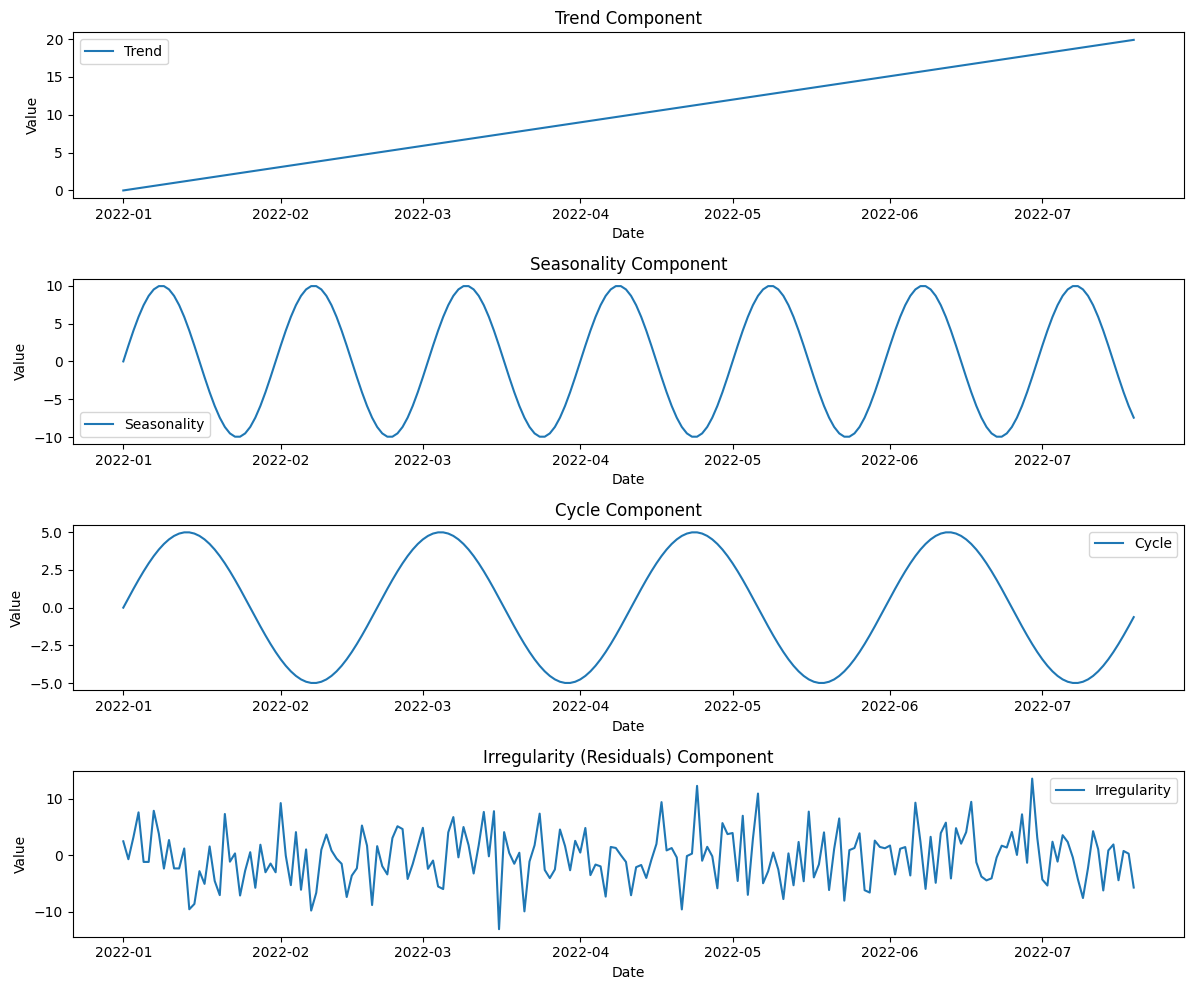

In [3]:
# Visualize each component separately
plt.figure(figsize=(12, 10))

# Trend
plt.subplot(4, 1, 1)
plt.plot(df['date'], trend, label='Trend')
plt.title('Trend Component')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Seasonality
plt.subplot(4, 1, 2)
plt.plot(df['date'], seasonality, label='Seasonality')
plt.title('Seasonality Component')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Cycle
plt.subplot(4, 1, 3)
plt.plot(df['date'], cycle, label='Cycle')
plt.title('Cycle Component')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Irregularity
plt.subplot(4, 1, 4)
plt.plot(df['date'], irregularity, label='Irregularity')
plt.title('Irregularity (Residuals) Component')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()

Stationarity is a crucial concept in time series analysis. A stationary time series is one whose statistical properties, such as mean, variance, and autocorrelation, remain constant over time. Non-stationary time series, on the other hand, exhibit trends, seasonality, or other patterns that make their statistical properties change over time.

Checking for stationarity involves assessing whether a time series is stationary or not. The presence of non-stationarity can impact the performance of time series models, as many models assume that the underlying time series data is stationary.

Here are common methods to check for stationarity:

-   Visual Inspection:

Plot the time series data and visually inspect for trends or seasonality.
Check for obvious patterns or cycles.

-   Summary Statistics:

Split the time series into two or more segments and compare summary statistics (mean, variance) between them.
If there is a significant difference, the series may not be stationary.

-   Augmented Dickey-Fuller (ADF) Test:

A statistical test that assesses the null hypothesis that a unit root is present in a time series sample. A unit root indicates non-stationarity.
If the p-value is below a certain significance level (commonly 0.05), you can reject the null hypothesis and infer stationarity.

-   Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test:

Another statistical test used to test for stationarity.
It tests the null hypothesis that the time series is stationary around a deterministic trend.

In [5]:
from statsmodels.tsa.stattools import adfuller

# Function to perform ADF test and print results
def adf_test(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    
    if result[1] <= 0.05:
        print("Reject the null hypothesis. The data is likely stationary.")
    else:
        print("Fail to reject the null hypothesis. The data is likely non-stationary.")

# Example usage
adf_test(df['value'])

ADF Statistic: -4.474997733543703
p-value: 0.00021813904656586887
Critical Values: {'1%': -3.465058702600837, '5%': -2.8767942675230356, '10%': -2.5749014492475535}
Reject the null hypothesis. The data is likely stationary.


-   The ADF test is applied to the 'value' column of the DataFrame.
    The ADF Statistic, p-value, and Critical Values are printed.
    If the p-value is less than the chosen significance level (e.g., 0.05), you can reject the null hypothesis and conclude that the data is likely stationary.
    Keep in mind that stationarity is an assumption for many time series models, and if your data is found to be non-stationary, you might need to apply transformations (like differencing) to make it stationary before modeling.